# The spark Foundation
# By:- Praful Gedam

## Data science And Business Analytics

## Task 02:- Preduction Using Unsupervised Machine Learning

# Dataset :- https://bit.ly/3kXTdox




In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [ ]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
df.shape

(150, 4)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# corelation between Variable
correlation =df.corr() 
correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Finding The optimum number of cluster for K Means? How does one determine the Value of k

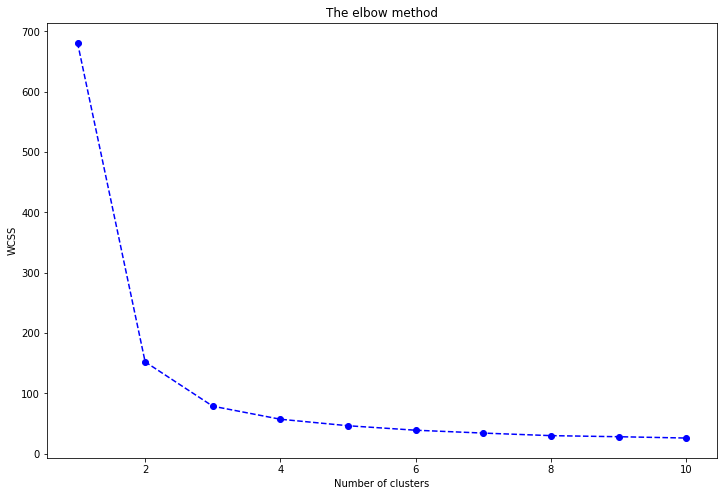

In [ ]:
plt.figure(figsize=(12,8))
x=df.iloc[:,[0,1,2,3]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, 'bo--')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### By the help of 'The Elbow Method' from the above graph, the optimum cluster is where the elbow occures. This is This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

### From this we choose the number of clusters is "3".

### Training The k means model on The Dataset

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 100)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


### Visualising the clusters - On the first two columns

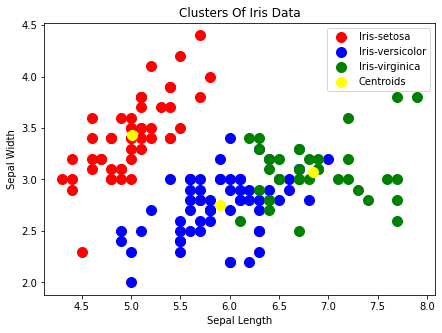

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(x[y_kmeans ==0, 0], x[y_kmeans ==0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans ==1, 0], x[y_kmeans ==1, 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans ==2, 0], x[y_kmeans ==2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c = 'yellow', label = 'Centroids')
plt.title('Clusters Of Iris Data')
plt.xlabel('Sepal Length', fontsize = 10)
plt.ylabel('Sepal Width', fontsize = 10)
plt.legend()
plt.show()

## Thus, we have predicted the number of clusters and represented it visually.